In [1]:
# -*- coding: utf-8 -*-
# リスト2-6  StatsModels を使って相関係数を計算するプログラム例
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # 回帰分析はstatsmodelsパッケージを利用する
icecream = [[1,464],[2,397],[3,493],[4,617],[5,890],[6,883],
       [7,1292],[8,1387],[9,843],[10,621],[11,459],[12,561]]
temperature = [[1,10.6],[2,12.2],[3,14.9],[4,20.3],[5,25.2],
       [6,26.3],[7,29.7],[8,31.6],[9,27.7],[10,22.6],[11,15.5],[12,13.8]]

x = np.array([u[1] for u in temperature])
y = np.array([u[1] for u in icecream])
X = np.column_stack((np.repeat(1, x.size), x))
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
b, a = results.params
print('a', a, 'b', b)
print('correlation coefficient', np.corrcoef(x, y)[0,1])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     48.46
Date:                Thu, 16 May 2019   Prob (F-statistic):           3.89e-05
Time:                        21:56:11   Log-Likelihood:                -75.369
No. Observations:                  12   AIC:                             154.7
Df Residuals:                      10   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -107.0571    128.673     -0.832      0.4

C:\Users\Takato\Anaconda3\envs\text\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


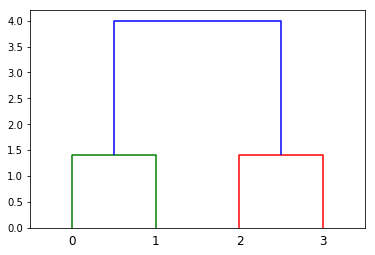

In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
X = np.array([[1,2], [2,1], [3,4], [4,3]])
Z = linkage(X, 'ward')  # Ward法を使って階層型クラスタリングを行う
dendrogram(Z)           # 樹形図（dendrogram）を描く
plt.show()              # 図形を画面に描画する


          出生地   身長  体重  年齢
Bill   Tronto  175  68  25
John  Detroit  183  70  23
Fred    Boise  190  72  26
Bill    68
John    70
Fred    72
Name: 体重, dtype: int64
      体重   身長
Bill  68  175
John  70  183
Fred  72  190
John    70
Fred    72
Name: 体重, dtype: int64
John    70
Fred    72
Name: 体重, dtype: int64
23
210
70.0
70.0
72


C:\Users\Takato\Anaconda3\envs\text\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


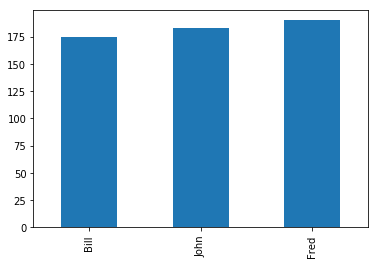

FileNotFoundError: [Errno 2] No such file or directory: 'ファイル名'

In [4]:
# -*- coding: utf-8 -*-
# リスト2-4  pandas のデータフレームを使ったプログラム例
import pandas as pd
indata = [('Tronto', 175, 68, 25), ('Detroit', 183, 70, 23), ('Boise', 190, 72, 26)]
df = pd.DataFrame(data=indata, columns=['出生地', '身長', '体重', '年齢'], \
                  index=['Bill', 'John', 'Fred'])
print(df)
print(df['体重'])
print(df[['体重', '身長']])
print(df['体重']['John':'Fred'])
print(df['体重'][1:3])
print(df.ix[1,3])  # id=1, col=3を指定

print(df['体重'].sum())     # 合計。結果は210
print(df['体重'].mean())    # 算術平均。結果は70.0
print(df['体重'].median())  # 中央値。結果は70.0
print(df['体重'].max())     # 最大値。結果は72

from matplotlib import pyplot as plt
df['身長'].plot.bar()  # pandasのデータフレームのメソッドplot.barを使う
plt.show()

df = pd.read_excel('ファイル名', 'Sheet1')        # xlsxファイルのSheet1を読み込む場合
df = pd.read_csv('ファイル名', encoding='utf-8')  # CSVファイルを読み込む場合
df.to_excel('test.xlsx', 'シート名')            # xlsxファイルを書き出す場合


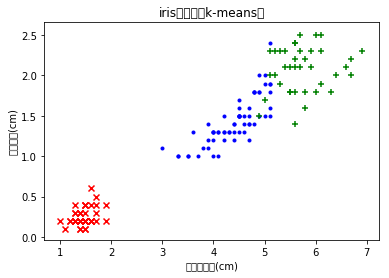

In [6]:
# -*- coding: utf-8 -*-
# リスト2-5 　scikit-learn を使って iris データを取り込み、散布図を描くプログラム例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
iris = load_iris()
species = ['Setosa','Versicolour', 'Virginica']
irispddata = pd.DataFrame(iris.data, columns=iris.feature_names)
irispdtarget = pd.DataFrame(iris.target, columns=['target'])

kmeans = KMeans(n_clusters=3).fit(irispddata)

irispd = pd.concat([irispddata, irispdtarget], axis=1)
iriskmeans = pd.concat([irispd, pd.DataFrame(kmeans.labels_, \
                        columns=['kmeans'])], axis=1)
irispd0 = iriskmeans[iriskmeans.kmeans == 0]
irispd1 = iriskmeans[iriskmeans.kmeans == 1]
irispd2 = iriskmeans[iriskmeans.kmeans == 2]

plt.scatter(irispd0['petal length (cm)'], irispd0['petal width (cm)'], c='red', \
            marker='x')
plt.scatter(irispd1['petal length (cm)'], irispd1['petal width (cm)'], c='blue', \
            marker='.')
plt.scatter(irispd2['petal length (cm)'], irispd2['petal width (cm)'], c='green', \
            marker='+')

plt.title('iris散布図、k-means法')
plt.xlabel('花弁の長さ(cm)')
plt.ylabel('花弁の幅(cm)')
plt.show()
